In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_UVM = pd.read_csv(
    os.path.join(os.getcwd(), 'datasets', 'GAUNVillaMaria_process.txt'),
    dtype={'postal_code': 'str'}
)

df_UF = pd.read_csv(
    os.path.join(os.getcwd(), 'datasets', 'GAUFlores_process.txt'),
    dtype={'postal_code': 'str'}
)

# 1. Análisis intra-universidad

## 1.1. Porcentaje de inscripción en función de la carrera

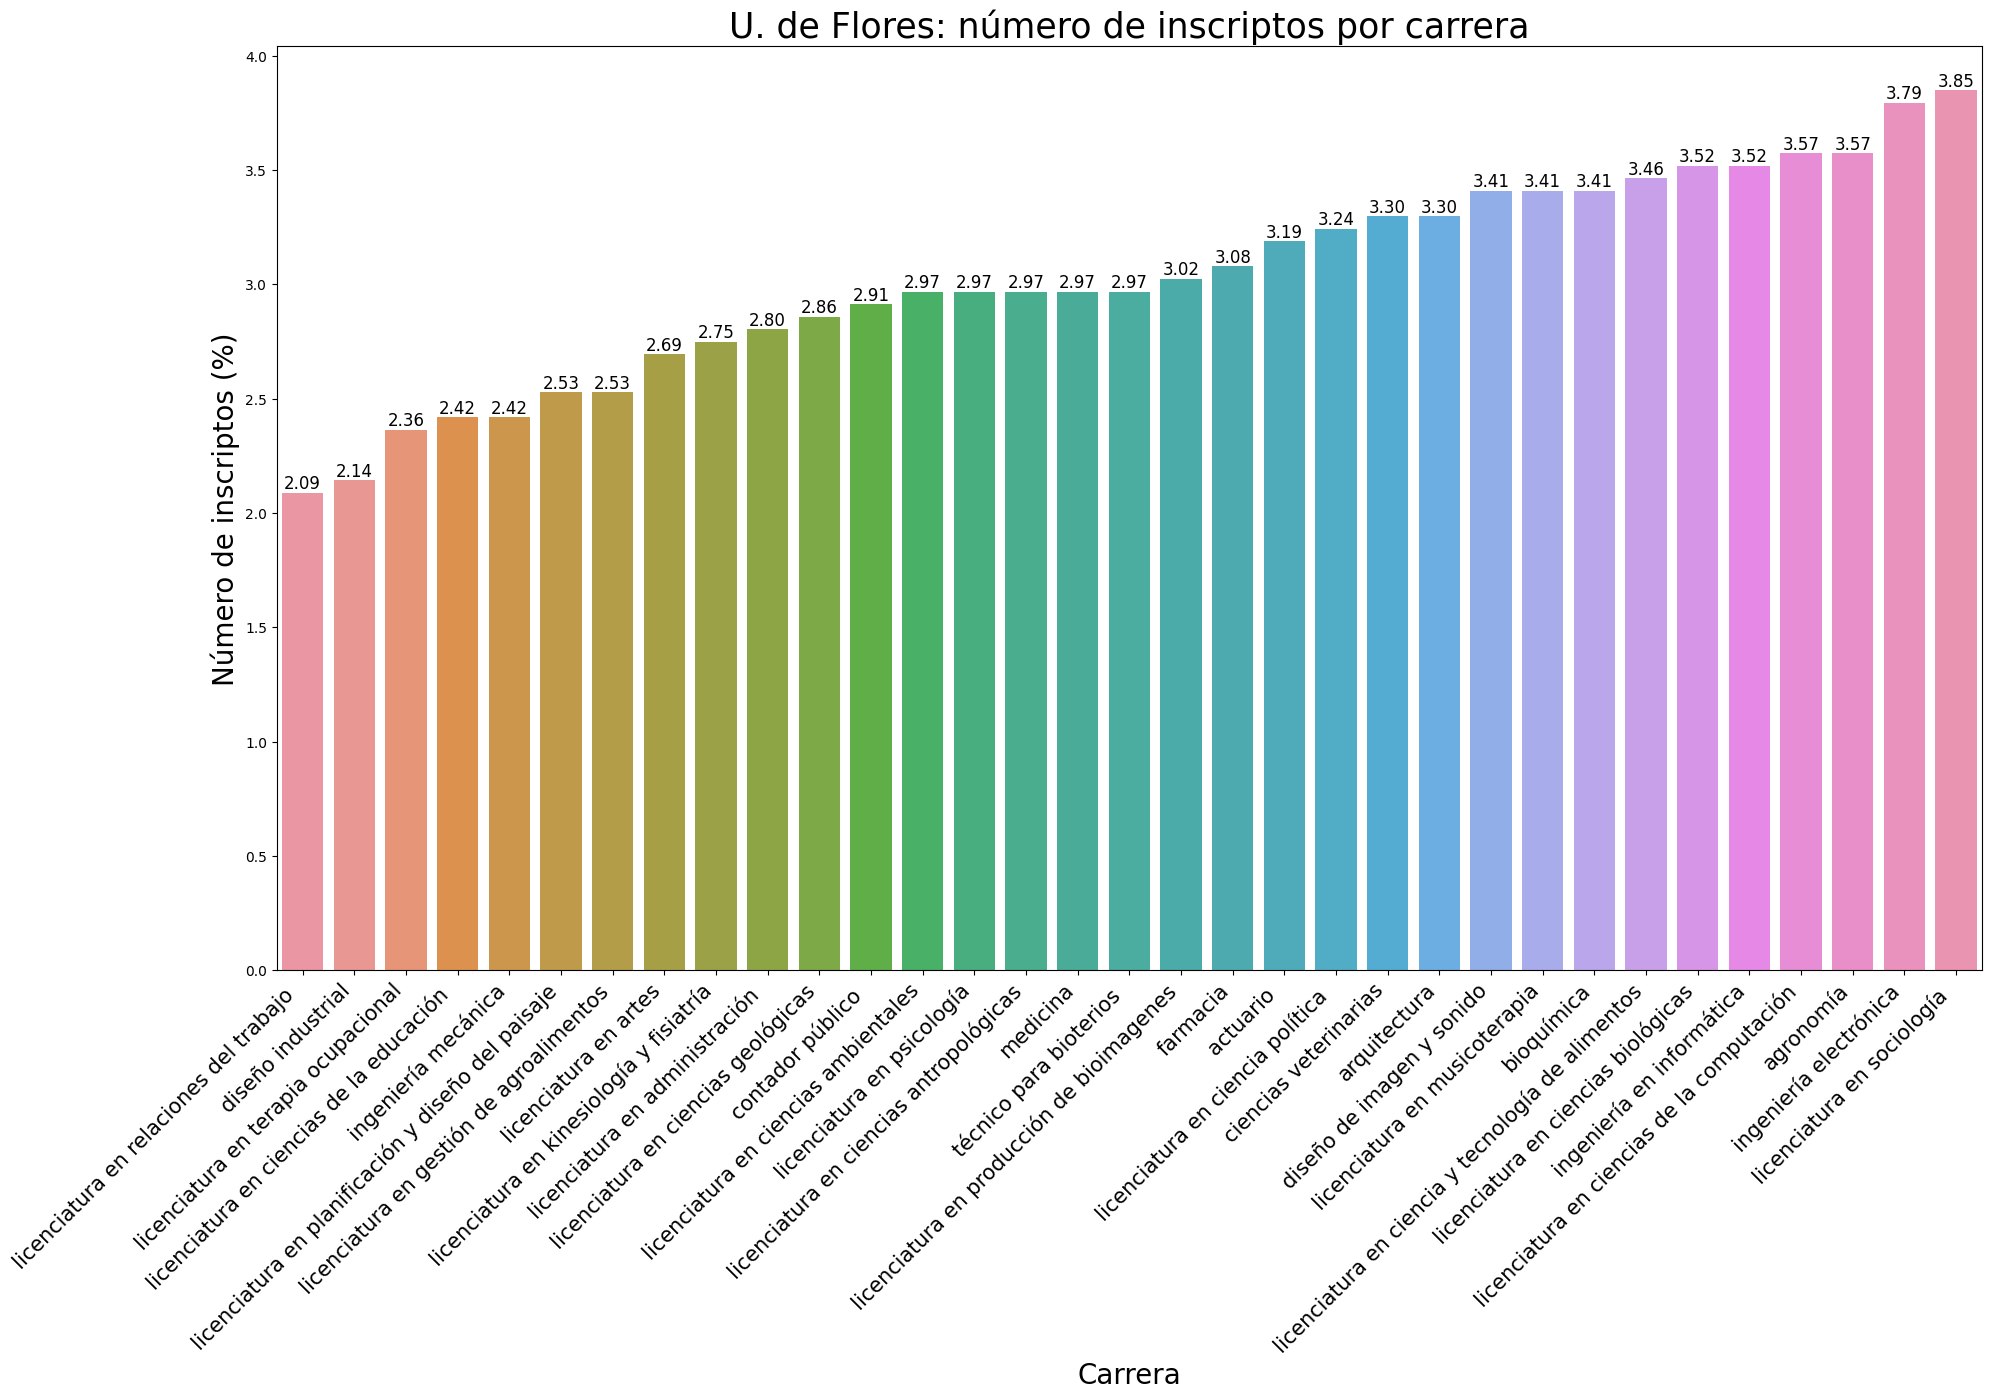

In [31]:
aux = df_UF[['university', 'career']].groupby('career').count().sort_values('university')/df_UF.shape[0]*100

plt.figure(figsize=(22,12))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. de Flores: número de inscriptos por carrera', fontsize=25)
plot.set_xlabel('Carrera', fontsize=20)
plot.set_xticklabels(aux.index, rotation=45, ha='right', fontsize=15)
plot.set_ylabel('Número de inscriptos (%)', fontsize=20)
plot.bar_label(plot.containers[0], fmt='%.2f', fontsize=12)
plt.show()

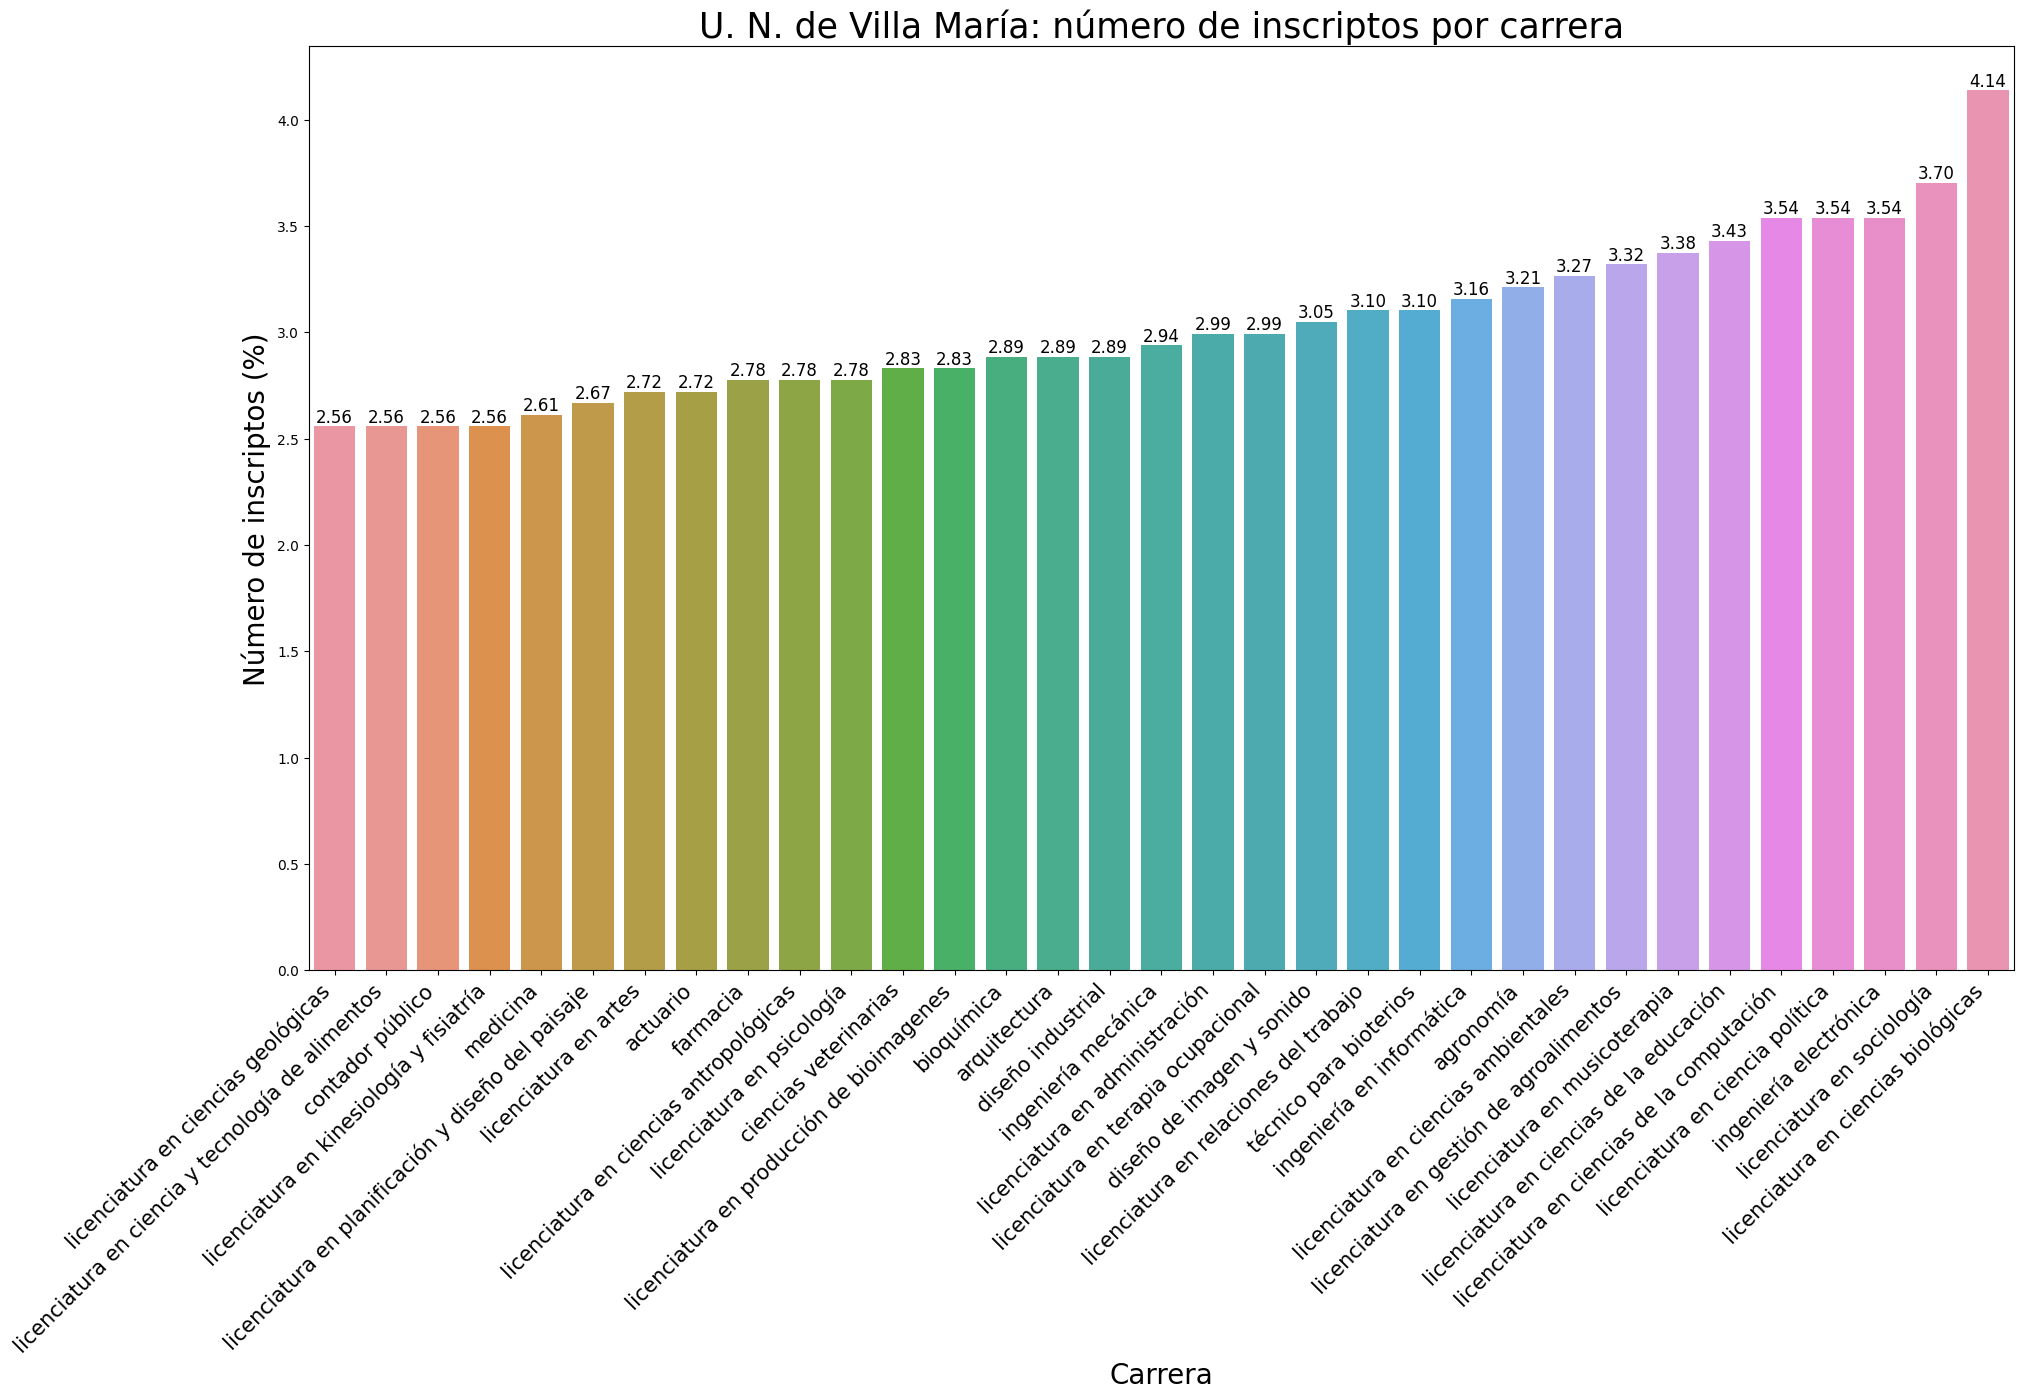

In [110]:
aux = df_UVM[['university', 'career']].groupby('career').count().sort_values('university')/df_UVM.shape[0]*100

plt.figure(figsize=(22,12))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. N. de Villa María: número de inscriptos por carrera', fontsize=25)
plot.set_xlabel('Carrera', fontsize=20)
plot.set_xticklabels(aux.index, rotation=45, ha='right', fontsize=15)
plot.set_ylabel('Número de inscriptos (%)', fontsize=20)
plot.bar_label(plot.containers[0], fmt='%.2f', fontsize=12)
plt.show()

## 1.2. Edad de inscripción (barras, histograma y diagrama de caja)
NOTA: el criterio para la determinación de los rangos etáreos en el gráfico de barras de cada universidad (particularmente, en el caso de la U. de Flores, la inclusión de un grupo de mayores de 105 años) obedeció a la adecuación de este gráfico a la districución arrojada por el histograma.

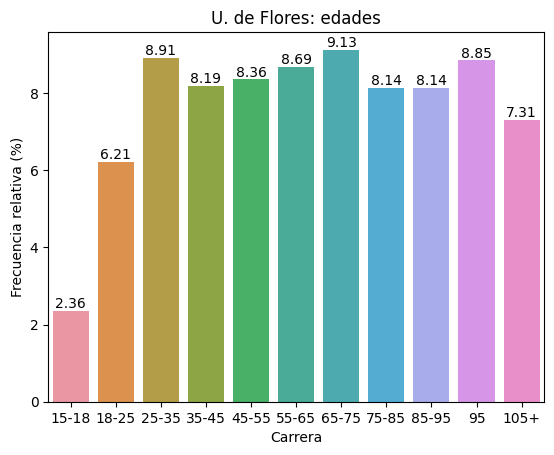

In [163]:
aux = pd.cut(
    df_UF['age'],
    bins=[15, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105, 150],
    right=True,
    labels=['15-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95', '95', '105+']
)

aux = (aux.groupby(aux).count()/df_UF.shape[0]*100).to_frame(name='count')

plot = sns.barplot(data=aux, x=aux.index, y='count')
plot.axes.set_title('U. de Flores: edades')
plot.set_xlabel('Grupo etáreo')
plot.set_xticklabels(aux.index)
plot.set_ylabel('Frecuencia relativa (%)')
plot.bar_label(plot.containers[0], fmt='%.2f')
plt.show()

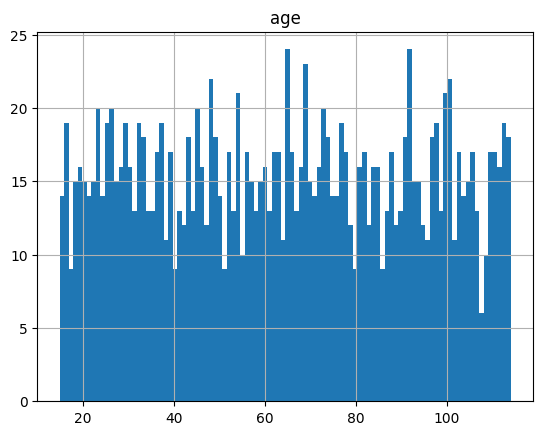

In [154]:
plot = df_UF[['age']].hist(bins=100)

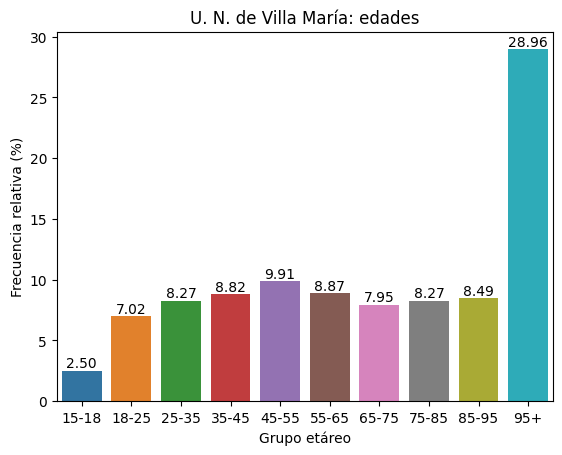

In [34]:
aux = pd.cut(
    df_UVM['age'],
    bins=[15, 18, 25, 35, 45, 55, 65, 75, 85, 95, 150],
    right=True,
    labels=['15-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95', '95+']
)

aux = (aux.groupby(aux).count()/df_UVM.shape[0]*100).to_frame(name='count')

plot = sns.barplot(data=aux, x=aux.index, y='count')
plot.axes.set_title('U. N. de Villa María: edades')
plot.set_xlabel('Grupo etáreo')
plot.set_xticklabels(aux.index)
plot.set_ylabel('Frecuencia relativa (%)')
plot.bar_label(plot.containers[0], fmt='%.2f')
plt.show()

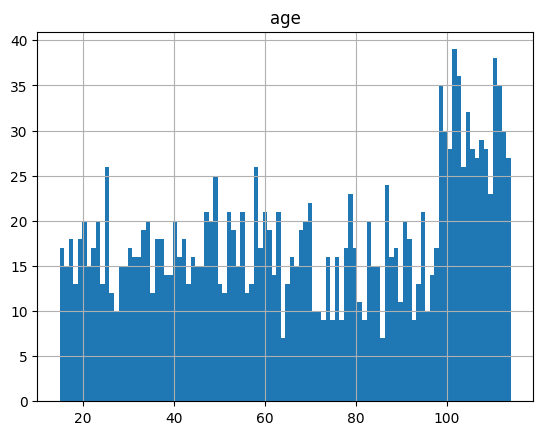

In [156]:
plot = df_UVM[['age']].hist(bins=100)

<AxesSubplot: >

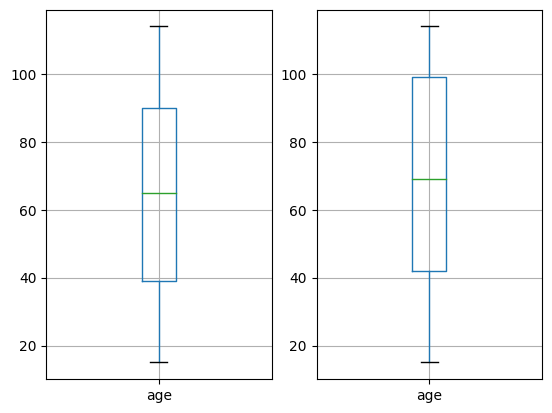

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_UF[['age']].boxplot(ax=axes[0])
df_UVM[['age']].boxplot(ax=axes[1])

## 1.3. Porcentaje de inscripción en función del género

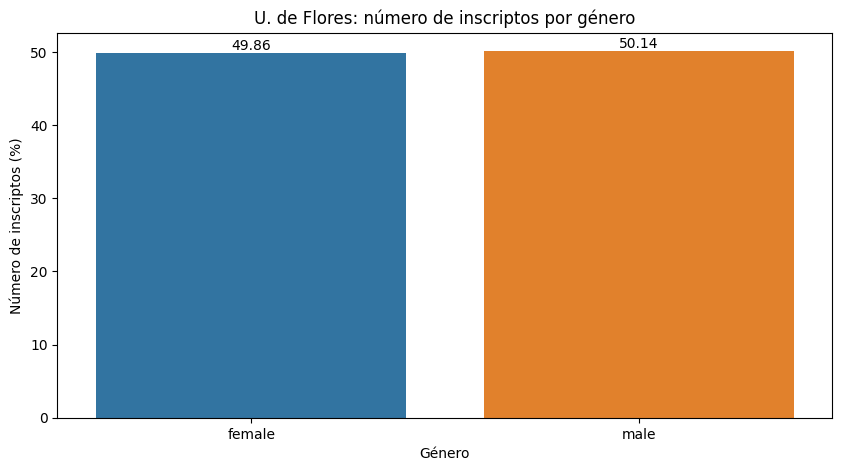

In [106]:
aux = df_UF[['university', 'gender']].groupby('gender').count().sort_values('university')/df_UF.shape[0]*100

plt.figure(figsize=(10,5))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. de Flores: número de inscriptos por género')
plot.set_xlabel('Género')
plot.set_xticklabels(aux.index)
plot.set_ylabel('Número de inscriptos (%)')
plot.bar_label(plot.containers[0], fmt='%.2f')
plt.show()

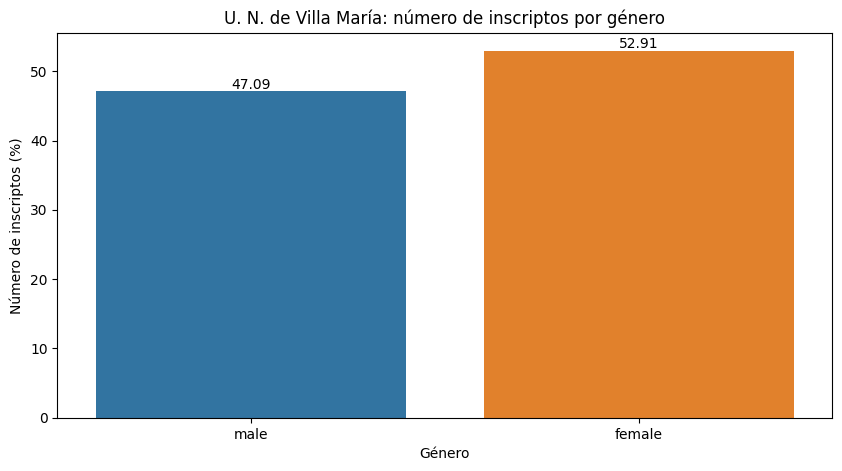

In [105]:
aux = df_UVM[['university', 'gender']].groupby('gender').count().sort_values('university')/df_UVM.shape[0]*100

plt.figure(figsize=(10,5))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. N. de Villa María: número de inscriptos por género')
plot.set_xlabel('Género')
plot.set_xticklabels(aux.index)
plot.set_ylabel('Número de inscriptos (%)')
plot.bar_label(plot.containers[0], fmt='%.2f')
plt.show()

## 1.4. Porcentaje de inscripción en función de la localidad

NOTA: Ya que hay mucha concentración de datos (dada la gran cantidad de localidades), se consideró preferible realizar un gráfico con el porcentaje de inscripción en todas ellas, sin labels en el eje x, de modo de permitir analizar la "densidad". De esta manera, se puede ver la formación de "clusters" en un primer gráfico con orden aleatorio, que se acentúa al ordenar los valores según el porcentaje de inscripción. Esto ocurre en ambas universidades. 

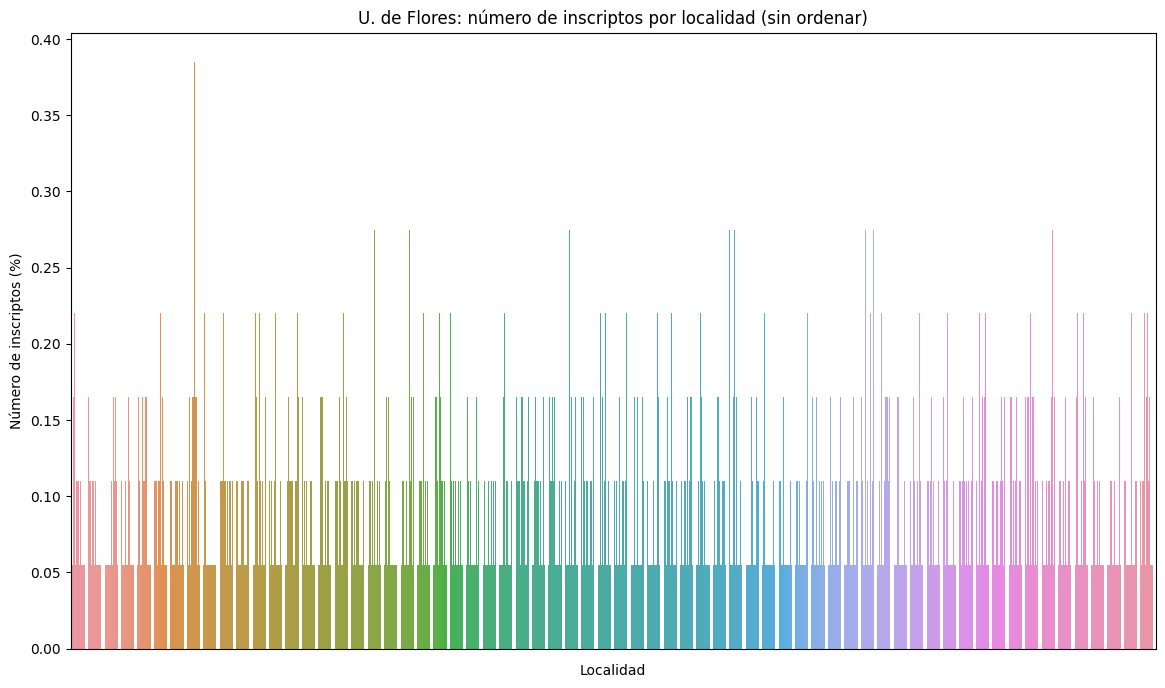

In [103]:
aux = df_UF[['university', 'location']].groupby('location').count()/df_UF.shape[0]*100

plt.figure(figsize=(14,8))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. de Flores: número de inscriptos por localidad (sin ordenar)')
plot.set_xlabel('Localidad')
plot.set(xticklabels=[])
plot.tick_params(bottom=False)
plot.set_ylabel('Número de inscriptos (%)')
plt.show()

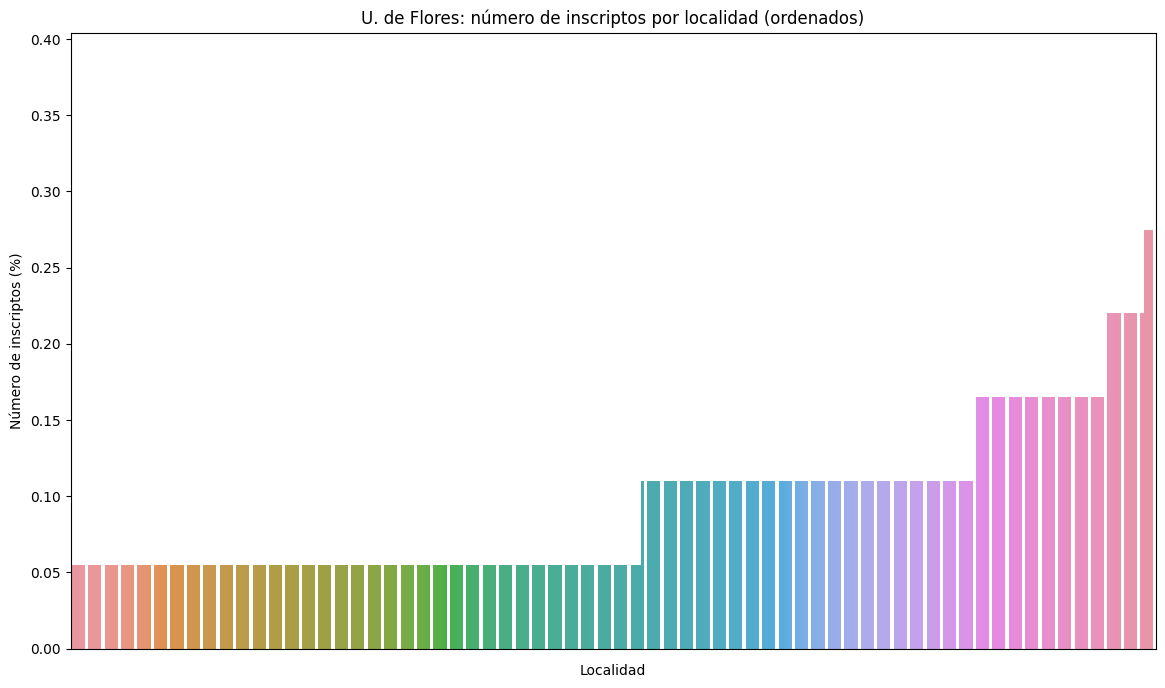

In [102]:
aux = df_UF[['university', 'location']].groupby('location').count().sort_values('university')/df_UF.shape[0]*100

plt.figure(figsize=(14,8))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. de Flores: número de inscriptos por localidad (ordenados)')
plot.set_xlabel('Localidad')
plot.set(xticklabels=[])
plot.tick_params(bottom=False)
plot.set_ylabel('Número de inscriptos (%)')
plt.show()

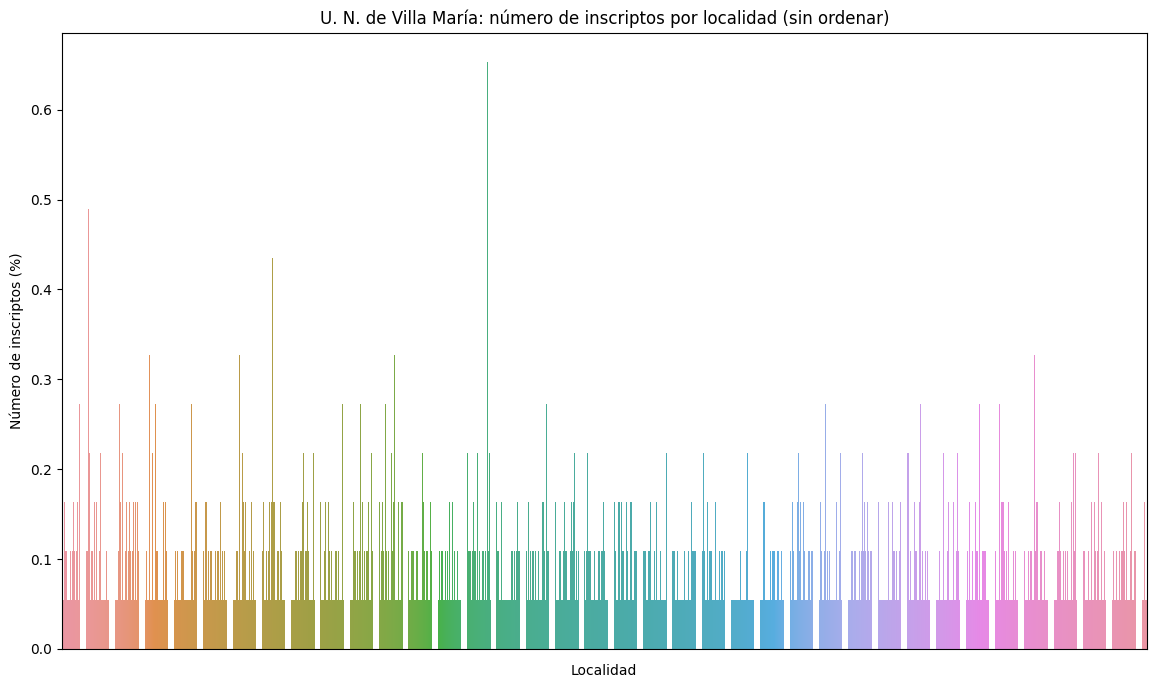

In [101]:
aux = df_UVM[['university', 'location']].groupby('location').count()/df_UVM.shape[0]*100

plt.figure(figsize=(14,8))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. N. de Villa María: número de inscriptos por localidad (sin ordenar)')
plot.set_xlabel('Localidad')
plot.set(xticklabels=[])
plot.tick_params(bottom=False)
plot.set_ylabel('Número de inscriptos (%)')
plt.show()

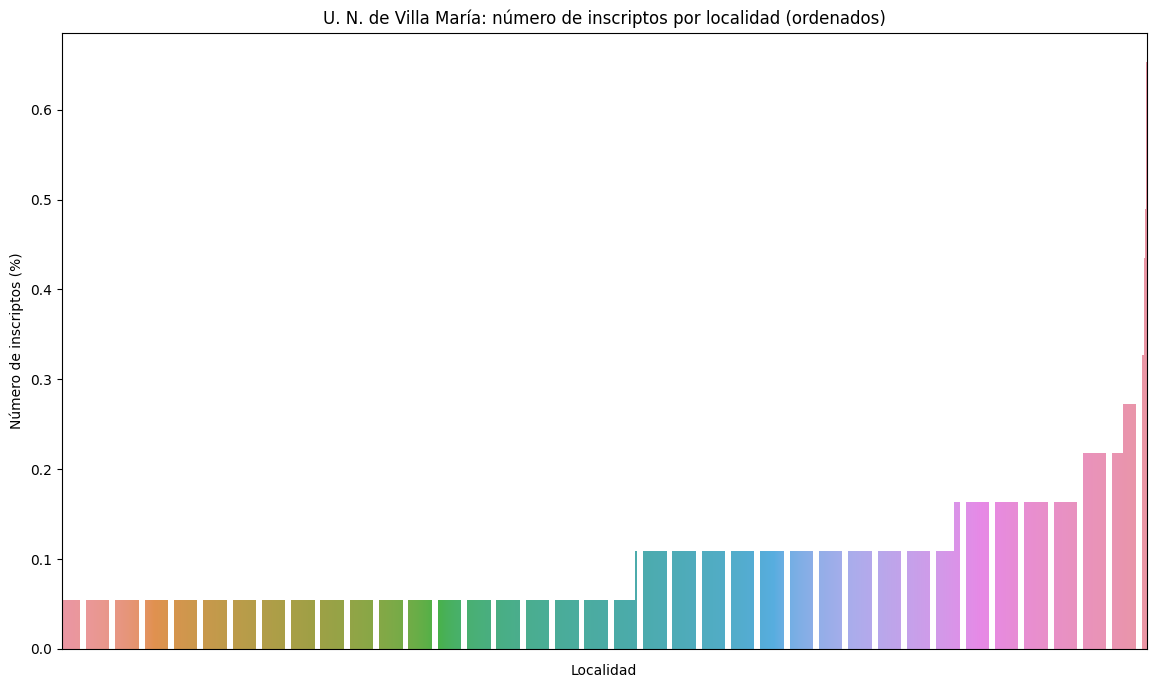

In [100]:
aux = df_UVM[['university', 'location']].groupby('location').count().sort_values('university')/df_UVM.shape[0]*100

plt.figure(figsize=(14,8))
plot = sns.barplot(data=aux, x=aux.index, y='university')
plot.axes.set_title('U. N. de Villa María: número de inscriptos por localidad (ordenados)')
plot.set_xlabel('Localidad')
plot.set(xticklabels=[])
plot.tick_params(bottom=False)
plot.set_ylabel('Número de inscriptos (%)')
plt.show()

# 2. Comparación de la inscripción entre universidades (barras e histograma)

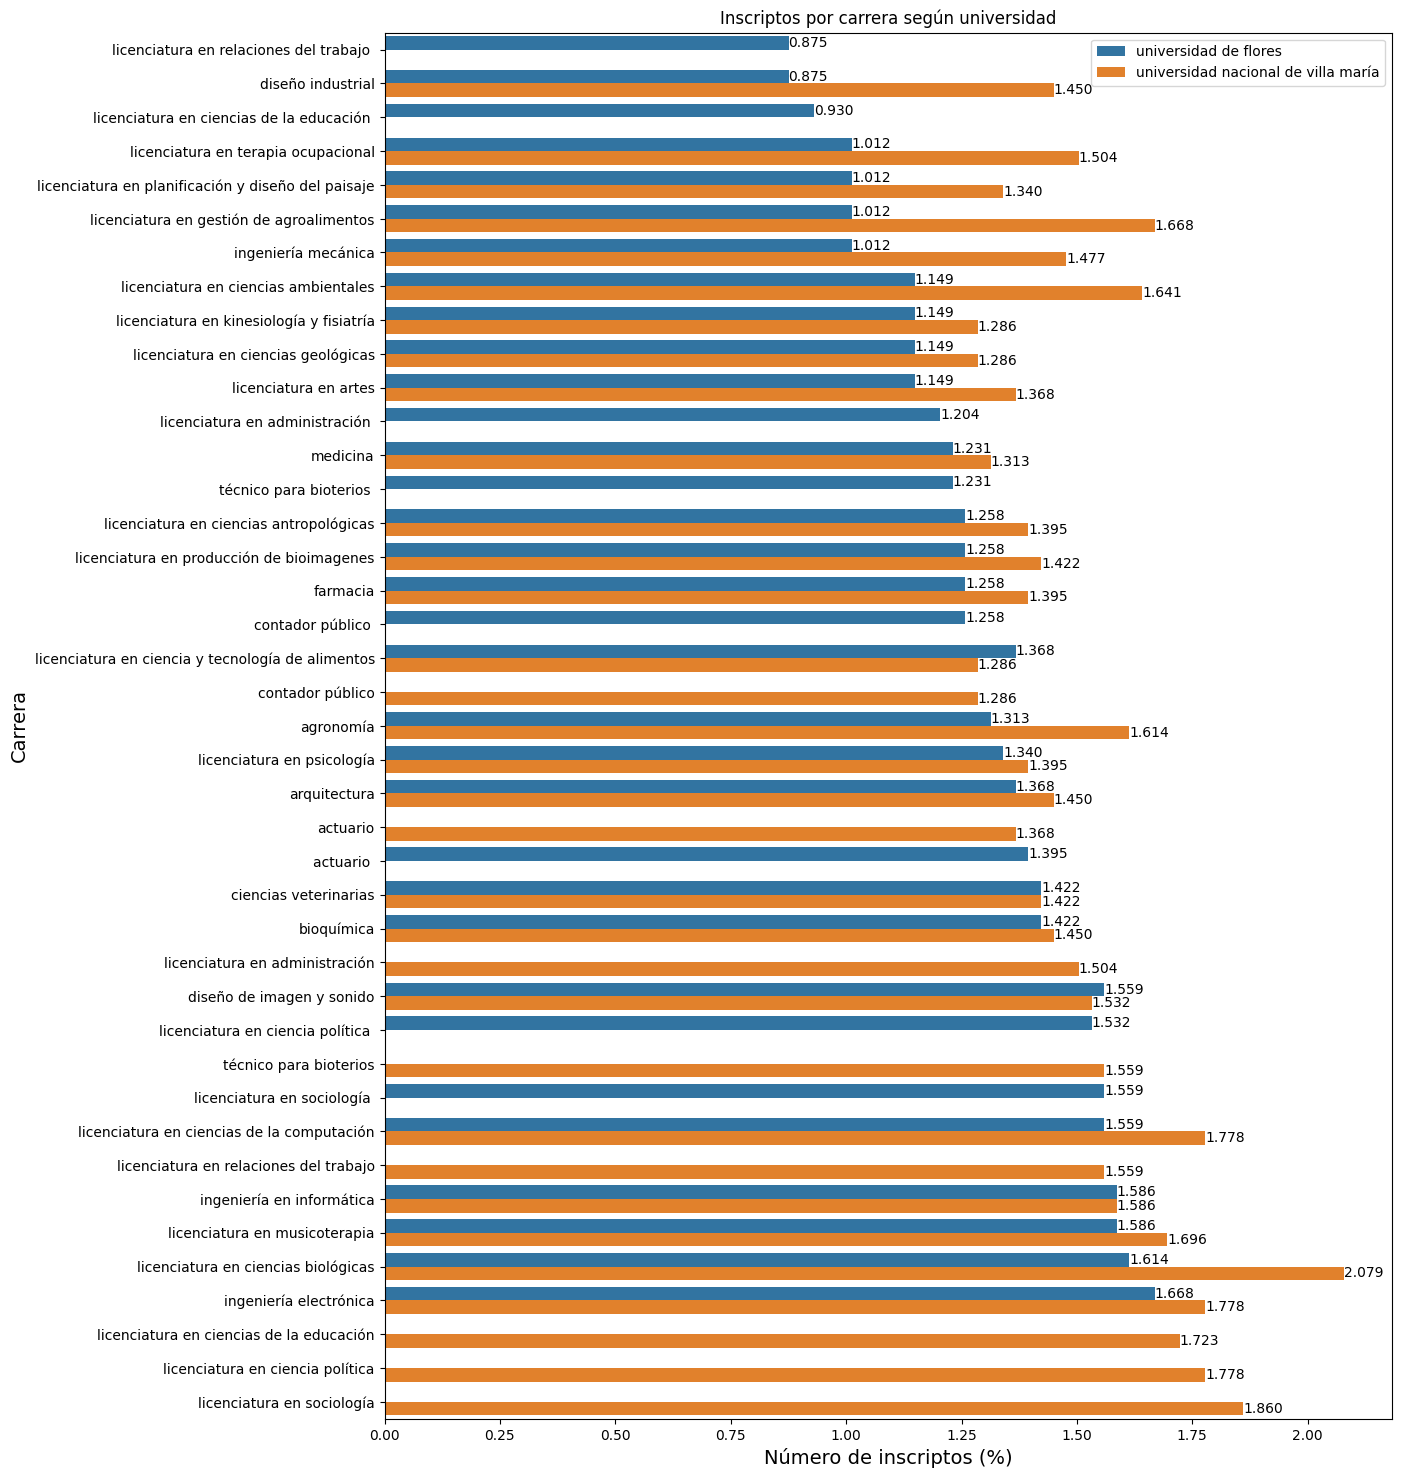

In [171]:
aux = pd.concat([df_UF, df_UVM])[['university', 'career', 'age']].groupby(['university', 'career']).count() \
    .sort_values('age')/(df_UF.shape[0]+df_UVM.shape[0])*100

plt.figure(figsize=(13,18))
plot = sns.barplot(x=aux.values.flatten(), y=aux.index.get_level_values(1), hue=aux.index.get_level_values(0))
plot.axes.set_title('Inscriptos por carrera según universidad')
plot.set_xlabel('Número de inscriptos (%)', fontsize=14)
plot.set_ylabel('Carrera', fontsize=14)
plot.bar_label(plot.containers[0], fmt='%.3f')
plot.bar_label(plot.containers[1], fmt='%.3f')
plt.legend(loc='upper right')
plt.show()

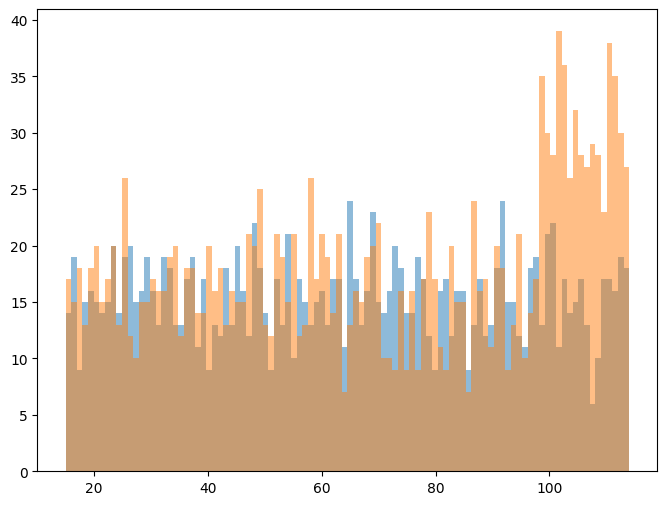

In [170]:
plt.figure(figsize=(8,6))
plt.hist(df_UF['age'], bins=100, alpha=0.5, label="data1")
plt.hist(df_UVM['age'], bins=100, alpha=0.5, label="data2")
plt.show()